In [16]:
import pandas as pd
import numpy as np
import random
import copy
import baltic as bt
#create classes
class Cell:
    def __init__(self):
        self.parent = None #cell it was derived from
        self.children = [] #set of daughter cells
        self.locx = None #x location in lattice
        self.locy = None #y location in lattice
        self.birthdate = None
        self.deathdate = None
        self.pmax = 10 #proliferation potential
        self.cellnum = None #unique cell number to identify
        self.alpha = 0.01 #probability of sponaneous death
        self.mutation_rate = 0.1 #probability of mutation per cell division
        self.motility = None #probability of migration per day
        self.proliferation_rate = None #average cell divisions per day
        self.clone = None
        self.mutations = []
        self.ps = 0
        self.curnode = None

class StemCell(Cell): #define stem cell class
    def __init__(self):
        Cell.__init__(self)
        self.pmax = float('inf') #infinite proliferation potential
        self.alpha = 0 #immortal
        self.ps = 0 #probability of symmetric division

class Clone(): #define clone class
    def __init__(self):
        self.parent = None
        self.children = []
        self.birthdate = None
        self.deathdate = None
        self.color = None
        self.clonenum = None
        self.mutations = []
        self.alive_cells = []
        self.node = None
class Mutation(): #definate mutation class
    def __init__(self):
        self.cells = []
        self.alive_cells = []
        self.mutnum = 'None'
        
#create lattice array
N = 2000 # starting demensions of lattice
lattice = np.empty( (N,N), dtype=object)

#parameters
proliferation_rate_CC = 1
proliferation_rate_CSC = 1
pmax_CC = 10
migration_potential = 15
alpha_CC = 0.05
cur_cellnum = 1
cur_mutnum = 0
cur_clonenum = 1
cur_index = 1
mutation_rate = 0.1

i = int(N/2) #to place founder cell in center of lattic
Fcell = StemCell() #initiate founder cell
Fcell.locx = i #x location in lattice
Fcell.locy = i #y location in lattice
Fcell.birthdate = 0
Fcell.cellnum = 0  #unique cell number to identify
Fcell.mutation_rate = mutation_rate #probability of mutation per cell division
Fcell.motility = migration_potential #probability of migration per day
Fcell.proliferation_rate = proliferation_rate_CSC #average cell divisions per da
Fcell.ps = 0.05

tree = bt.tree()
root = bt.node()
root.length=0 ## branch length,
root.height=0 ## height, set by traversing the tree, which adds up branch lengths along the way
root.absoluteTime=0 ## branch end point in absolute time, once calibrations are done
root.index='root' ## index of the character designating this object in the tree string, it's a unique identifier for every object in the tree
root.x=0## X and Y coordinates of this node, once drawTree() is called
tree.Objects.append(root)
tree.nodes.append(root)
tree.root = root
Fcell.curnode = root



#initial founder clone object
Fclone = Clone()
Fclone.clone_num = 0
Fclone.birthdate = 0
Fcell.clone = Fclone
Fclone.alive_cells.append(Fcell)
#Fclone.node = root

#initiate desired tracking system
simpsons_diversity = [] #list to keep track of diversity at each time step
clones = [] #list to contain each clone in population
clones.append(Fclone) #add founding clone to list
alive_cells = [] #list to keep track of cells currently alive in population
alive_cells.append(Fcell)
mutations = []


#time parameters
dt = 1/float(24) # time is equilavent to 1/24 of a day or 1 hour
time = 0 #initialize time to 0
stop_time = 10 #stop simulation after this many days


def adjacent_cell(lattice,i,j): #function to check if adjacent cells are empty
    free_cells = []
    change = [1,-1]
    for c in change:
        checki = lattice[i+c,j]
        if checki == None:
            free_cells.append([i+c,j])
        checkj = lattice[i, j+c]
        if checkj == None:
            free_cells.append([i,j+c])
        for h in change:
            checkd = lattice[i+h,j+c]
            if checkd == None:
                free_cells.append([i+h,j+c])
    return free_cells

while time < stop_time:
    time += dt
    cell_stack = random.sample(alive_cells,len(alive_cells)) #random order of cells
    for cell in cell_stack:
        alive = True
        r = random.uniform(0, 1)
        pd = cell.proliferation_rate * dt #probability of proliferation in time dt
        free_cells = adjacent_cell(lattice,cell.locx,cell.locy)
        if r < pd: # Does cell attempt to divide? 
            r = random.uniform(0,1)
            pdie = cell.alpha * pd #probability of spontaneously dying
            if r < pdie:
                alive = False
            elif len(free_cells) > 0: #is there any space to divide?
                if cell.pmax > 0: #is cell proliferation capacity exhausted?
                    r = random.uniform(0,1)
                    if r <= cell.ps: #does cell divide asymmetrically?
                        new_cell = Cell()
                        new_cell.mutation_rate = cell.mutation_rate #probability of mutation per cell division
                        new_cell.motility = cell.motility#probability of migration per day
                        new_cell.proliferation_rate = cell.proliferation_rate #average cell divisions per day
                        new_cell.clone = cell.clone
                        new_cell.mutations = cell.mutations
                        new_cell.alpha = cell.alpha + 0.01
                        new_cell.curnode = cell.curnode
                    else:
                        new_cell = copy.deepcopy(cell)
                        
                    new_cell.parent = cell
                    newloc = random.choice(free_cells)
                    new_cell.locx = newloc[0] #x location in lattice
                    new_cell.locy = newloc[1] #y location in lattice
                    new_cell.birthdate = time
                    new_cell.cellnum = cur_cellnum #unique cell number to identify
                    cur_cellnum += 1
                    new_cell.children = []
                    new_cell.mutations = cell.mutations
                    print 'divided'
                    

                    r = random.uniform(0,1)
                    if r < cell.mutation_rate: #does cell gain a mutation?
                        #new_mut = Mutation()
                        #new_mut.mutnum = cur_mutnum
                        #new_cell.mutations.append(new_mut)
                        #new_clone = Clone() #new mutation defines new clone group
                        #new_clone.parent = cell.clone
                        #new_clone.birthdate = time
                        #new_clone.clonenum = cur_clonenum
                        #cur_clonenum += 1
                        #new_clone.parent.children.append(new_clone) 
                        #new_clone.children.append(new_cell)
                        #clones.append(new_clone)
                        #mutations.append(new_mut)
                        new_node = bt.node()
                        new_node.length= time - cell.curnode.x ## branch length,
                        new_node.height = time
                        new_node.absoluteTime=time ## branch end point in absolute time, once calibrations are done
                        new_node.parent=cell.curnode ## reference to parent node of the node
                        new_cell.curnode = new_node
                        new_node.index=cur_index ## index of the character designating this object
                        cur_index += 1
                        new_node.numName = new_node.index
                        new_node.locx = cell.locx
                        new_node.locy = cell.locy
                        new_node.x=time ## X and Y coordinates of this node, once drawTree() is called
                        #new_clone.node = new_node
                        new_node.parent.children.append(new_node)
                        tree.Objects.append(new_node)
                        tree.nodes.append(new_node)
                        print 'mutated'

                    #else:
                        #cell.clone.alive_cells.append(new_cell)
                        
                    #for mut in new_cell.mutations:
                        #mut.alive_cells.append(new_cell)
                        #mut.cells.append(new_cell)
                        
                    cell.children.append(new_cell)
                    alive_cells.append(new_cell)
                    lattice[new_cell.locx,new_cell.locy] = new_cell
                    cell.pmax -= 1        
                else:
                    alive = False
            elif random.uniform(0, 1) < (cell.motility*dt): #if doesn't divide does it move (mutually exclusive)
                if len(free_cells) > 0:
                    newloc = random.choose(free_cells)
                    lattice[cell.locx,cell.locy] = 'None'
                    cell.locx = newloc[0]
                    cell.locy = newloc[1]
                    lattice[cell.locx,cell.locy] = cell
                    print 'moved'
        if alive == False:
            alive_cells.remove(cell)
            cell.deathdate = time
            #cell.clone.alive_cells.remove(cell)
            #if len(cell.clone.alive_cells) < 1:
                #cell.clone.deathdate = time
            #for mut in cell.mutations:
                #mut.alive_cells.remove(cell)
                #if len(mut.alive_cells) < 1:
                    #mutations.remove(mut)
            new_leaf = bt.leaf()
            new_leaf.index=cur_index ## index of the character that defines this object, will be a unique ID for each object in the tree
            cur_index += 1
            new_leaf.length=time - cell.curnode.x ## branch length
            new_leaf.absoluteTime=time ## position of tip in absolute time
            new_leaf.parent=cell.curnode ## parent
            new_leaf.x=time## position of tip on x axis if the tip were to be plotted
            new_leaf.locx = cell.locx
            new_leaf.locy = cell.locy
            tree.Objects.append(new_leaf)
            tree.leaves.append(new_leaf)
            print 'died'


for cell in alive_cells:
    
    new_leaf = bt.leaf()
    new_leaf.index=cur_index ## index of the character that defines this object, will be a unique ID for each object in the tree
    cur_index += 1
    new_leaf.length=stop_time - cell.curnode.x ## branch length
    new_leaf.height = stop_time
    new_leaf.absoluteTime=stop_time ## position of tip in absolute time
    new_leaf.parent=cell.curnode ## parent
    new_leaf.x=stop_time## position of tip on x axis if the tip were to be plotted
    new_leaf.parent.children.append(new_leaf)
    new_leaf.numName = new_leaf.index
    tree.Objects.append(new_leaf)
    tree.leaves.append(new_leaf)
    curnode = new_leaf.parent
    while curnode != None:
        curnode.leaves.append(new_leaf)
        curnode = curnode.parent

tree.treeHeight = stop_time
    



divided
divided
divided
divided
divided
divided
mutated
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
mutated
divided
divided
mutated
divided
divided
divided
divided
mutated
divided
divided
divided
mutated
divided
divided
divided
divided
divided
divided
divided
divided
divided
mutated
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
divided
mutated
divided
divided
divided
divided
mutated
divided
divided
divided
divided
divided
divided
divided
mutated
divided
divided
mutated
divided
divided
divided
divided
divided
divided
mutated
divided
divided
divided
divided
divided
divided
mutated
divided
divided
divided
divided
divided
divided
divided
divided
mutated
divided
divided
divided
divided
divided
divided
mutated
divided
divided
divided
divided
divided
mutated
divided
divided
divided
divided
divided


In [26]:
tree.drawTree()

ValueError: 34 is not in list

In [22]:
from operator import attrgetter
diff = 1/len(clones)
sortedclones = sorted(clones, key=attrgetter('birthdate'))
print sortedclones
sortedclones[0].color = diff
for c in range(1,len(sortedclones)):
    print c
    sortedclones[c].color =  sortedclones[c-1].color + diff    

[<__main__.Clone instance at 0x000000000B833C48>]


In [23]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
%matplotlib inline 
## Magic words for jupyter notebooks

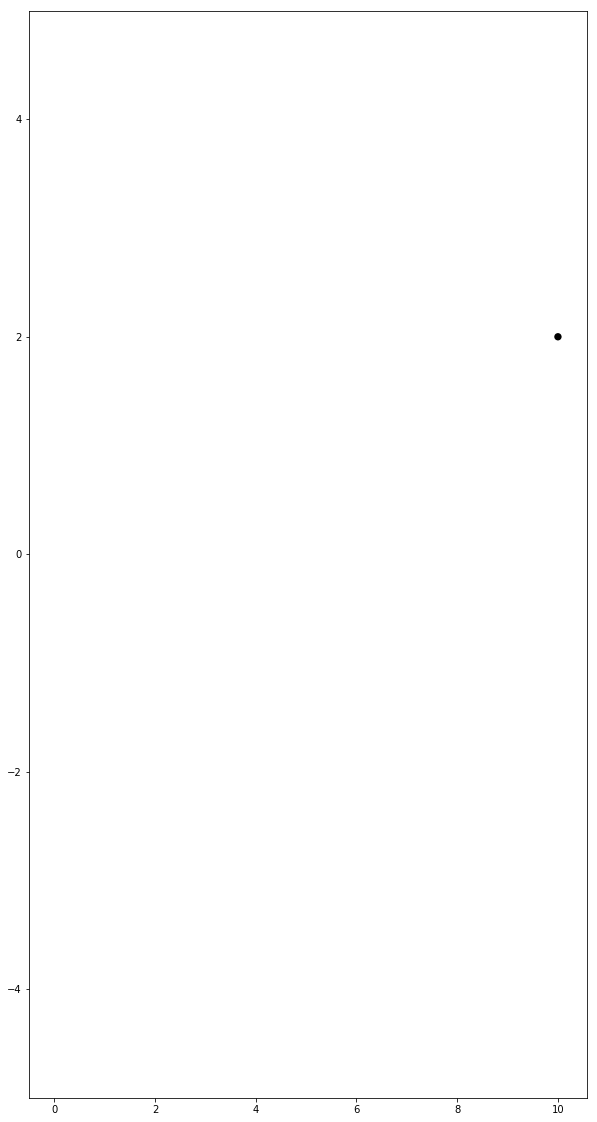

In [24]:
fig1,ax = plt.subplots(figsize=(10,20),facecolor='w')
#ax = fig.add_subplot(3, 1, 1)

branchWidth=2 ## default branch width

cmap=mpl.cm.viridis ## colors! https://github.com/blab/wiki/wiki/Colors

for k in tree.Objects: ## iterate over objects in tree
    x=k.x ## or from x position determined earlier
#     x=k.absoluteTime ## or use absolute time instead
    y=k.y ## get y position from .drawTree that was run earlier, but could be anything else
    if k.parent != None:
        xp=k.parent.x ## get x position of current object's parent
    else:
        xp = None
#     xp=k.parent.absoluteTime ## get x position of current object's parent
    if x==None: ## matplotlib won't plot Nones, like root
        x=0.0
    if xp==None:
        xp= x
    c = 'k'
    #if (isinstance(k, bt.leaf) or k.branchType=='leaf') and len(k.name.split('|')) > 1:
    #if isinstance(k, bt.leaf) and len(k.name.split('|')) > 1:
        #c = colors[k.name.split('|')[-3]]
    #else:
        #c='dimgray' ## colour can be fixed
    #if k.traits['clone'] != 'nan':
        #c = colors2[k.traits['clone']] if k.traits.has_key('clone') else cmap(1.0)[0]
    #else: c = 'silver'
#     c=cmap(k.height/ll.treeHeight) ## or be a function of something else
#     c=[cmap(k.traits['host.prob']) if k.traits.has_key('host.prob') else cmap(1.0)][0]
#     c=['indianred' if k.traits['PB1']=='V' else 'steelblue'][0] ## can be discrete too
    
    if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
        #x=decimalDate(k.name.split('_')[-1],variable=True) ## get x position from name
        
        s=30 ## tip size can be fixed
        #s=50-30*k.height/tree2.treeHeight
        
        ax.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=11) ## plot circle for every tip
        ax.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=10) ## plot black circle underneath
    elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
        #ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=9)
        ax.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth, color= c ,ls='-',zorder=9)
        
    #ax.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=9)
    ax.plot([xp,x],[y,y],lw=branchWidth,color= c ,ls='-',zorder=9)
    
       
ax.set_ylim(-5,tree.ySpan+5)
#han_list = []

#for key in colors2:
    #marker = mlines.Line2D(range(1), range(1), color = colors2[key], marker='o', markerfacecolor = colors2[key], label = key, markeredgecolor='k',markersize = 8)
    #han_list.append(marker)

#plt.legend(handles = han_list,markerfirst = True,title = 'Clone')
plt.savefig('figures/CSCsimultationtree.png')
plt.show()